# MNIST VERİ SETİ

In [15]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
len(train_labels)

60000

In [18]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
test_images.shape

(10000, 28, 28)

In [20]:
len(test_labels)

10000

In [21]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [22]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [23]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [24]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [25]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8733 - loss: 0.4424
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9670 - loss: 0.1172
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9791 - loss: 0.0706
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9846 - loss: 0.0504
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9892 - loss: 0.0363


In [26]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([2.5594704e-07, 5.5816629e-10, 4.4205322e-06, 5.9928185e-05,
       7.2840614e-12, 3.9741916e-08, 1.0141539e-12, 9.9993116e-01,
       3.5975809e-08, 4.1243520e-06], dtype=float32)

In [28]:
predictions[0].argmax()

np.int64(7)

In [29]:
predictions[0][7]

np.float32(0.99993116)

In [30]:
test_labels[0]

np.uint8(7)

In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")
print(f"test_loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9784 - loss: 0.0769
test_acc: 0.9815000295639038
test_loss: 0.06508830934762955


# SİNİR AĞLARI İÇİN VERİ GÖSTERİMİ

In [35]:
#scalar -> tek boyutlu vektör, rank(0)
import numpy as np
x = np.array(12)
x

array(12)

In [36]:
x.ndim

0

In [37]:
# vektör rank 1 tensors
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [40]:
x.ndim # 5 adet verisi ver. 5D vector ama 1D tensor,
#her bir [] tensör diyebiliriz.

1

In [41]:
# matris -> 2D tensors
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35 ,1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [45]:
# rank 3 -> 3D tensors
x = np.array([[[5, 78, 2, 34, 0],
              [6, 79, 3, 35 ,1],
              [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35 ,1],
              [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35 ,1],
              [7, 80, 4, 36, 2]]])

x.ndim

3

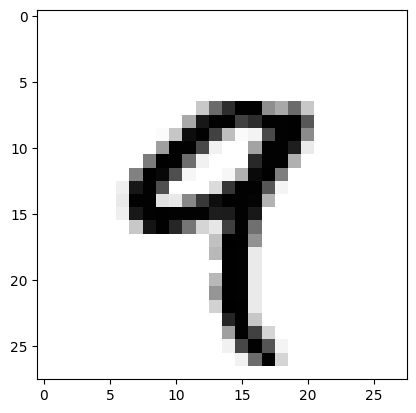

In [56]:
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [50]:
train_labels[4]

np.uint8(9)

In [51]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [52]:
my_slice = train_images[10:100, : , : ]
my_slice.shape

(90, 28, 28)

In [53]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [54]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

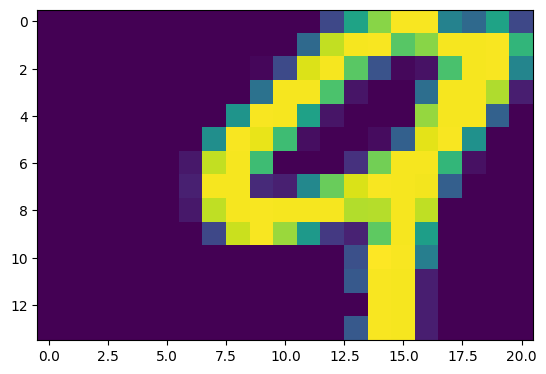

In [58]:
train_digit = train_images[4, 7:-7, :-7]
plt.imshow(train_digit)
plt.show()

# BATCH

In [59]:
# batchler bir gruplar, model genel olarak datasetini tek seferde işlemez, böler

In [60]:
batch = train_images[:128]
batch = train_images[128:255]

In [61]:
batch.shape

(127, 28, 28)

In [67]:
# n. batch
n = 3
batch = train_images[128 * n: 128 * (n+1)]
batch.shape

'''
veri setini 128 128 olarak bölüyoruz
kaçıncı 128'lik bölümü aradığımızı bu şekilde buluyoruz
'''

"\nveri setini 128 128 olarak bölüyoruz\nkaçıncı 128'lik bölümü aradığımızı bu şekilde buluyoruz\n"

# elle relu yazma

In [79]:
X = np.array([
    [-1, 2, -3],
    [4, -5, 6]
])

In [80]:
def naive_relu(x):
  assert len(x.shape) == 2
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i,j], 0)
  return x

naive_relu(X)


array([[0, 2, 0],
       [4, 0, 6]])

In [89]:
Y = np.array([
    [2, -4, 7],
    [-2, 9, -1]
])

def naive_add(x, y):
  assert len(x.shape) == 2
  assert x.shape == y.shape
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i ,j] += y[i, j]

  return x

print(X)
print(Y)
naive_add(X,Y)


[[-1  2 -3]
 [ 4 -5  6]]
[[ 2 -4  7]
 [-2  9 -1]]


array([[ 1, -2,  4],
       [ 2,  4,  5]])

In [92]:
# kendi yazdığımız ile zaman farkı

import time
x = np.random.random((20,100))
y = np.random.random((20,100))

t0 = time.time()
for _ in range(1000):
  z = x + y
  z = np.maximum(z, 0.)
  print("Took: {0:.2f} s".format(time.time() - t0))


Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s

In [93]:
t0 = time.time()
for _ in range(1000):
  z = naive_add(x,y)
  z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.93 s


# Broadcast

farklı shape'e ve boyuta sahip tensörlerde işlem yapmak. 2D bir tensor ile 1D vektör toplanacaksa, vektör tüm 2D elemanlarına uygulanır (broadcast edilir).


In [115]:
import numpy as np
x = np.random.random((32, 10)) # 32 x 10 matris
y = np.random.random((10,)) # 10 x 1 vector
print(f"x_dim : {x.ndim} and x_shape : {x.shape}\ny_dim : {y.ndim} and y_shape : {y.shape}")
y

x_dim : 2 and x_shape : (32, 10)
y_dim : 1 and y_shape : (10,)


array([0.74454922, 0.33619262, 0.21255552, 0.68579545, 0.15154048,
       0.89750789, 0.31898802, 0.55759564, 0.15320677, 0.35310577])

In [116]:
y = np.expand_dims(y, axis = 0)
print(f"y_dim : {y.ndim} and y_shape : {y.shape}")

y_dim : 2 and y_shape : (1, 10)


In [117]:
y

array([[0.74454922, 0.33619262, 0.21255552, 0.68579545, 0.15154048,
        0.89750789, 0.31898802, 0.55759564, 0.15320677, 0.35310577]])

In [118]:
y = np.concatenate([y] * 32, axis=0)
print(f"y_dim : {y.ndim} and y_shape : {y.shape}")
y

y_dim : 2 and y_shape : (32, 10)


array([[0.74454922, 0.33619262, 0.21255552, 0.68579545, 0.15154048,
        0.89750789, 0.31898802, 0.55759564, 0.15320677, 0.35310577],
       [0.74454922, 0.33619262, 0.21255552, 0.68579545, 0.15154048,
        0.89750789, 0.31898802, 0.55759564, 0.15320677, 0.35310577],
       [0.74454922, 0.33619262, 0.21255552, 0.68579545, 0.15154048,
        0.89750789, 0.31898802, 0.55759564, 0.15320677, 0.35310577],
       [0.74454922, 0.33619262, 0.21255552, 0.68579545, 0.15154048,
        0.89750789, 0.31898802, 0.55759564, 0.15320677, 0.35310577],
       [0.74454922, 0.33619262, 0.21255552, 0.68579545, 0.15154048,
        0.89750789, 0.31898802, 0.55759564, 0.15320677, 0.35310577],
       [0.74454922, 0.33619262, 0.21255552, 0.68579545, 0.15154048,
        0.89750789, 0.31898802, 0.55759564, 0.15320677, 0.35310577],
       [0.74454922, 0.33619262, 0.21255552, 0.68579545, 0.15154048,
        0.89750789, 0.31898802, 0.55759564, 0.15320677, 0.35310577],
       [0.74454922, 0.33619262, 0.2125555

In [122]:
def naive_add_matrix_and_vector(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  x = x.copy()

  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

In [125]:
# peki hangi değişken broadcast yapılmasına daha uygun

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32,10))
z = np.maximum(x,y)
print(z.shape)

(64, 3, 32, 10)


# tensor çarpımı -> nokta çarpımı


In [134]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x,y)
print(f"z.shape: {z.shape} çünkü z.ndim: {z.ndim} -> skaler bir sayı")

z.shape: () çünkü z.ndim: 0 -> skaler bir sayı


In [150]:
def naive_vector_dot(x,y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]
  z = 0.
  for i in range(x.shape[0]):
    z += x[i] * y[i]
  return z

print(f"{naive_vector_dot(x,y)} vs {np.dot(x,y)}")


9.525104966109826 vs 9.525104966109827


In [166]:
a = np.array([3,2,1])
b = np.array([4,5,6])
c = np.array([[7,2,5], [4, 1, 6]])
print(np.dot(a,b))

28


In [167]:
a.shape, b.shape, c.shape


((3,), (3,), (2, 3))

In [176]:
def naive_matrix_vector_dot(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i, j] * y[j]
  return z

naive_matrix_vector_dot(c,a)

array([30., 20.])

In [175]:
def naive_matrix_vector_dot(x,y):
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    z[i] = naive_vector_dot(x[i,:], y)
  return z

naive_matrix_vector_dot(c,a)

array([30., 20.])

In [191]:
c = np.array([[7,2], [4, 1]])
d = np.array([[3,1,6], [7, 4, 9]])

def naive_matrix_dot(x,y):
  assert x.shape[0] == 2
  assert y.shape[0] == 2
  assert x.shape[1] == y.shape[0]
  z = np.zeros((x.shape[0],  y.shape[1]))

  for i in range(x.shape[0],):
    for j in range(y.shape[1]):
      row_x = x[i, : ]
      column_y = y[:, j]
      z[i, j] = naive_vector_dot(row_x, column_y)
  return z


naive_matrix_dot(c,d)

array([[35., 15., 60.],
       [19.,  8., 33.]])

# MATRİSLERDE İŞLEMLERİ DAHA İYİ ANLAMAK İÇİN EGZERSİZLER
Matrislerde işlem yapmaya daha da aşina olabilmek için uygulamalı lineer cebir kitabındaki örnekleri çözüyorum

In [200]:
# matrislerde toplama

A = np.array([[1,-2,3],
              [2,-1,4]
              ])
B = np.array([[0,2,1],
              [1,3,-4]
              ])

print(f"A: {A.shape} vs B: {B.shape}")

print(f"{A + B}")

z = np.zeros((A.shape[0], A.shape[1]))
for i in range(A.shape[0]):
  for j in range(A.shape[1]):
    z[i, j] = A[i, j] + B[i, j]
print(f"{z}")


A: (2, 3) vs B: (2, 3)
[[1 0 4]
 [3 2 0]]
[[1. 0. 4.]
 [3. 2. 0.]]


In [233]:
# skalar çarpım
A = np.array(-2)
B = np.array([[4,-2,-3],
              [7,-3,2]
              ])

z = np.zeros((B.shape[0], B.shape[1]))
for i in range(B.shape[0]):
  for j in range(B.shape[1]):
    z[i,j] += A * B[i,j]
print(z)


print(A*B)

[[ -8.   4.   6.]
 [-14.   6.  -4.]]
[[ -8   4   6]
 [-14   6  -4]]


In [237]:
# matris farkı
A = np.array([[2,3,-5],
              [4,2,1]
              ])

B = np.array([[2,-1,3],
              [3,5,-2]
              ])

A = A.copy()

for i in range(A.shape[0]):
  for j in range(A.shape[1]):
      A[i, j] -= B[i, j]

A

array([[ 0,  4, -8],
       [ 1, -3,  3]])

In [242]:
A = np.array([
    [0, -3, 5],
    [2,3,4],
    [1,-2,-3]])

B = np.array([
    [5, 2, 3],
    [6,2,3],
    [-1,-2,3]
])

z = np.dot(3,A) - np.dot(0.5, B)
z

array([[ -2.5, -10. ,  13.5],
       [  3. ,   8. ,  10.5],
       [  3.5,  -5. , -10.5]])

# Tensor reshaping
satır ve sütunları tekrardan düzenliyoruz


In [267]:
x = np.array([
    [0., 1.],
    [2., 3.],
    [4., 5.]
])

print(x.shape,end="\n--------------\n")
x = x.reshape((6,1))
print(x)
print(x.shape,end="\n--------------\n")
x = x.reshape((2,3))
print(x)
print(x.shape,end="\n--------------\n")
"""
burada
0 2 4
1 3 5

şeklinde transpoz almak yerine

0 1 2
3 4 5

geldi çünkü reshape öncelikle hepsini tek bir satıra alıyor "flatten" yapıyor
[0 1 2 3 4 5] oluyor ve sonrasında ayırıyor

"""

(3, 2)
--------------
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
(6, 1)
--------------
[[0. 1. 2.]
 [3. 4. 5.]]
(2, 3)
--------------


'\nburada \n0 2 4 \n1 3 5\n\nşeklinde transpoz almak yerine \n\n0 1 2 \n3 4 5\n\ngeldi çünkü reshape öncelikle hepsini tek bir satıra alıyor "flatten" yapıyor\n[0 1 2 3 4 5] oluyor ve sonrasında ayırıyor\n\n'

In [268]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

In [269]:
x = np.array([
    [0., 1.],
    [2., 3.],
    [4., 5.]
])

print(x,end="\n------------\n")

print(np.transpose(x))

[[0. 1.]
 [2. 3.]
 [4. 5.]]
------------
[[0. 2. 4.]
 [1. 3. 5.]]
